# Image Augmentation con Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

from keras.utils import to_categorical

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Preparazione dei dati
Carichiamo il dataset Fashion MNIST utilizzando Keras e preprocessiamo i dati.

In [2]:
from keras.datasets import fashion_mnist

# Caricamento del dataset

labels = ["T-shirt/top","Pantalone","Pullover","Vestito","Cappotto","Sandalo","Maglietta","Sneaker","Borsa","Stivaletto"]

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Encoding delle immagini

X_train = X_train.reshape(X_train.shape[0],28*28)
X_test = X_test.reshape(X_test.shape[0],28*28)

# Normalizzazione

X_train = X_train/255
X_test = X_test/255

# Encoding del target

num_classes=10

y_train_dummy = to_categorical(y_train, num_classes)
y_test_dummy = to_categorical(y_test, num_classes)

Adesso ogni immagine è codificata in un vettore contenente il valore dei pixel normalizzati disposti su di un'unica riga.
<br>
Il target è codificato all'interno di 10 variabili dummy, una per ogni classe, in cui la variabile alla posizione della classe di appartenenza vale 1 (True), mentre le altre valgono 0 (False).

## Generare nuove immagini

In [7]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')

def plot_samples(X_batch):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        plt.axis('off')
    plt.show()

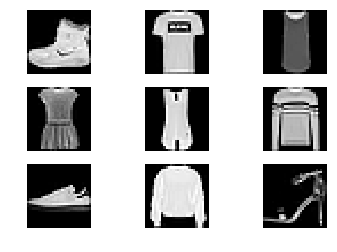

In [33]:
plot_samples(X_train)

### Feature Standardization

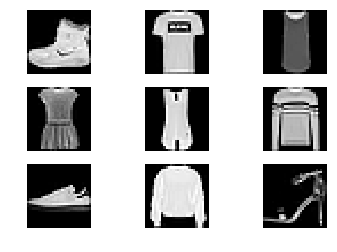

In [18]:
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
K.set_image_dim_ordering('th')

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    plot_samples(X_batch)
    break

### ZCA Whitening

/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:836: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


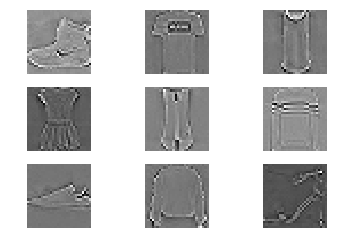

In [19]:
datagen = ImageDataGenerator(zca_whitening=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    plot_samples(X_batch)
    break

### Random Rotations

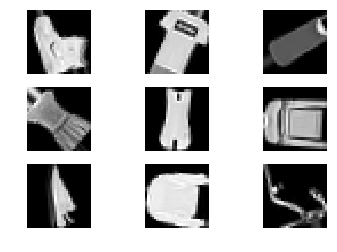

In [14]:
datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    plot_samples(X_batch)
    break

### Random Shifts

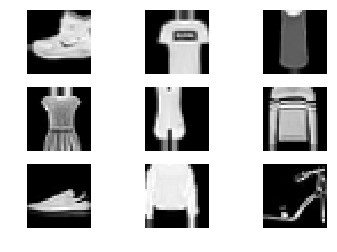

In [40]:
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    plot_samples(X_batch)
    break

### Random Flips

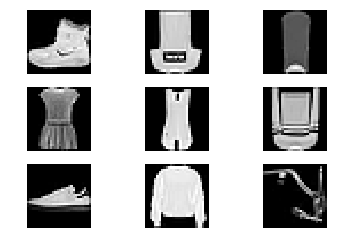

In [42]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    plot_samples(X_batch)
    break

## Salvare le immagini generate

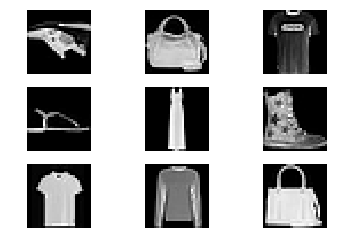

In [44]:
from os import makedirs

makedirs('images')

datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='fashion_mnist', save_format='png'):
    plot_samples(X_batch)
    break

## Addestrare una rete con un generatore

In [3]:
# from keras.regularizers import l1 # Nel caso volessi utilizzare solo la regolarizzazione l1
from keras.regularizers import l1_l2,l2
from keras.layers import Flatten

"""
Train Accuracy = 0.8295 - Train Loss = 0.7705
Test Accuracy = 0.8204 - Test Loss = 0.8011
"""

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(1,28,28), kernel_regularizer=l2(0.01)))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.0001,l2=0.001)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1, 28, 512)        14848     
_________________________________________________________________
flatten_1 (Flatten)          (None, 14336)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               3670272   
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 3,719,306
Trainable params: 3,719,306
Non-trainable params: 0
_________________________________________________________________


In [15]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
datagen.fit(X_train)

train_generator = datagen.flow(X_train, y_train_dummy, batch_size=512, shuffle=False)

model.fit_generator(train_generator, epochs=10, steps_per_epoch=X_train.shape[0]//512)

#metrics_train = model.evaluate(X_train, y_train_dummy, verbose=0)
#metrics_test = model.evaluate(X_test, y_test_dummy, verbose=0)

#print("Train Accuracy = %.4f - Train Loss = %.4f" % (metrics_train[1], metrics_train[0]))
#print("Test Accuracy = %.4f - Test Loss = %.4f" % (metrics_test[1], metrics_test[0]))

Epoch 1/10
117/117 [==============================] - 32s 271ms/step - loss: 1.4074 - acc: 0.7453
Epoch 2/10
117/117 [==============================] - 38s 325ms/step - loss: 0.9814 - acc: 0.7856
Epoch 3/10
117/117 [==============================] - 45s 383ms/step - loss: 0.8481 - acc: 0.8033
Epoch 4/10
117/117 [==============================] - 47s 402ms/step - loss: 0.7685 - acc: 0.8161
Epoch 5/10
117/117 [==============================] - 56s 476ms/step - loss: 0.7184 - acc: 0.8252
Epoch 6/10
117/117 [==============================] - 50s 426ms/step - loss: 0.6810 - acc: 0.8322
Epoch 7/10
117/117 [==============================] - 44s 378ms/step - loss: 0.6521 - acc: 0.8383
Epoch 8/10
117/117 [==============================] - 54s 463ms/step - loss: 0.6292 - acc: 0.8437
Epoch 9/10
117/117 [==============================] - 63s 535ms/step - loss: 0.6123 - acc: 0.8462
Epoch 10/10
117/117 [==============================] - 56s 475ms/step - loss: 0.5957 - acc: 0.8501


In [22]:
# Save augmented images to file
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os
from keras import backend as K
K.set_image_dim_ordering('tf')
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
#os.makedirs('images')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:1358: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')
/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:1643: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


ValueError: Unsupported channel number: 28